<a href="https://colab.research.google.com/github/Q-annnnn/USTH_Machine_learning_2/blob/main/LW2_Trung_Quan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from plotnine import ggplot, aes, geom_point
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names =[ "sepal length", "sepal width", "petal length", "petal width", "class"] )
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
from sklearn.preprocessing import LabelEncoder
lae= LabelEncoder()
df["class"]= lae.fit_transform(df["class"])
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
x = df.iloc[:, 0:4].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

AHC

In [ ]:
y = df.iloc[:,0:4]
y

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
ahc= AgglomerativeClustering()
ahc.fit(x)

AgglomerativeClustering()

In [ ]:
sl = sch.linkage(x, method="single", metric= "euclidean")
sl

array([[9.00000000e+00, 3.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.70000000e+01, 1.50000000e+02, 0.00000000e+00, 3.00000000e+00],
       [1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+01, 1.54000000e+02, 1.41421356e-01, 3.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [4.00000000e+00, 1.57000000e+02, 1.41421356e-01, 4.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e

In [ ]:
cl = sch.linkage(x, method="complete", metric= "euclidean")
cl

array([[9.00000000e+00, 3.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.70000000e+01, 1.50000000e+02, 0.00000000e+00, 3.00000000e+00],
       [1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+00, 3.80000000e+01, 1.41421356e-01, 2.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.41421356e

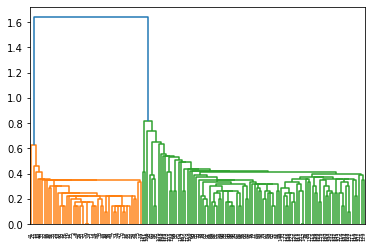

In [ ]:
s_linkage= sch.dendrogram(sch.linkage(x, method="single", metric= "euclidean"))

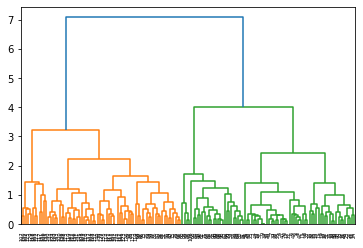

In [ ]:
c_linkage= sch.dendrogram(sch.linkage(x, method="complete", metric= "euclidean"))

In [ ]:
auth = ahc.labels_
auth

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y["AHC"] = auth
y

,sepal length,sepal width,petal length,petal width,AHC
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


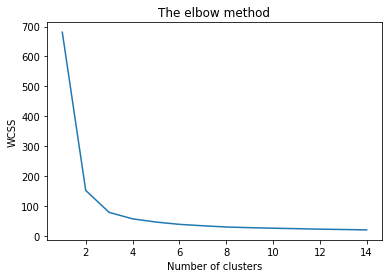

In [ ]:
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 15), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
kmeans2 = KMeans(n_clusters = 2)
y_kmeans2 = kmeans2.fit_predict(x)


In [ ]:
y_kmeans2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

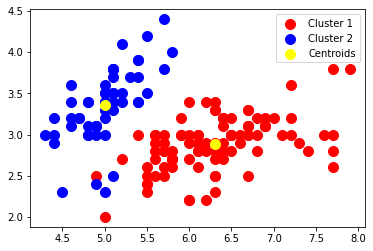

In [ ]:
#
plt.scatter(x[y_kmeans2 == 0, 0], x[y_kmeans2 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans2 == 1, 0], x[y_kmeans2 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
#
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [ ]:
kmeans3 = KMeans(n_clusters = 3)
y_kmeans3 = kmeans3.fit_predict(x)
kmeans.fit_predict(x)
df_y_kmeans3= pd.DataFrame(y_kmeans3)
print(df["class"])
print(df_y_kmeans3)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64
     0
0    1
1    1
2    1
3    1
4    1
..  ..
145  0
146  2
147  0
148  0
149  2

[150 rows x 1 columns]


In [ ]:
ev=pd.DataFrame({"labels": y_kmeans3, "class": df["class"]})
ev

,labels,class
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
145,0,2
146,2,2
147,0,2
148,0,2


In [ ]:
ct = pd.crosstab(ev["labels"], ev["class"])
print(ct)

class    0   1   2
labels            
0        0   2  36
1       50   0   0
2        0  48  14


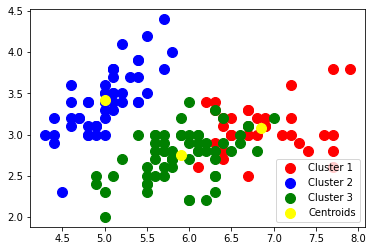

In [ ]:
#
plt.scatter(x[y_kmeans3 == 0, 0], x[y_kmeans3 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans3 == 1, 0], x[y_kmeans3 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans3 == 2, 0], x[y_kmeans3 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#
plt.scatter(kmeans3.cluster_centers_[:, 0], kmeans3.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [ ]:
# calculate the accuracy of the model.
correct = 0

for i in range(0,150):
    if df["class"][i] == df_y_kmeans3[0][i]:
        correct+=1
print(correct/150)

0.09333333333333334


In [ ]:
from sklearn.cluster import KMeans
kmeans4 = KMeans(n_clusters = 4)
y_kmeans4 = kmeans4.fit_predict(x)

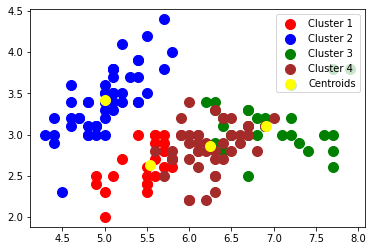

In [ ]:
#
plt.scatter(x[y_kmeans4 == 0, 0], x[y_kmeans4 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans4 == 1, 0], x[y_kmeans4 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans4 == 2, 0], x[y_kmeans4 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans4 == 3, 0], x[y_kmeans4 == 3, 1], s = 100, c = 'brown', label = 'Cluster 4')
#
plt.scatter(kmeans4.cluster_centers_[:, 0], kmeans4.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

In [ ]:
from sklearn.cluster import KMeans
kmeans5 = KMeans(n_clusters = 5)
y_kmeans5 = kmeans5.fit_predict(x)

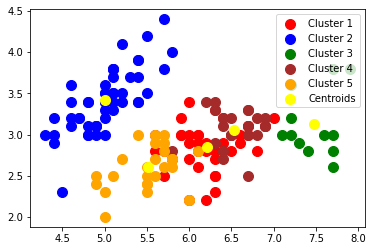

In [ ]:
#
plt.scatter(x[y_kmeans5 == 0, 0], x[y_kmeans5 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_kmeans5 == 1, 0], x[y_kmeans5 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_kmeans5 == 2, 0], x[y_kmeans5 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_kmeans5 == 3, 0], x[y_kmeans5 == 3, 1], s = 100, c = 'brown', label = 'Cluster 4')
plt.scatter(x[y_kmeans5 == 4, 0], x[y_kmeans5 == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
#
plt.scatter(kmeans5.cluster_centers_[:, 0], kmeans5.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

PCA after clustering

PCA 2D

In [ ]:
from sklearn.preprocessing import StandardScaler
datascaled = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
#PCA 2D projection
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(datascaled)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalComponents

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

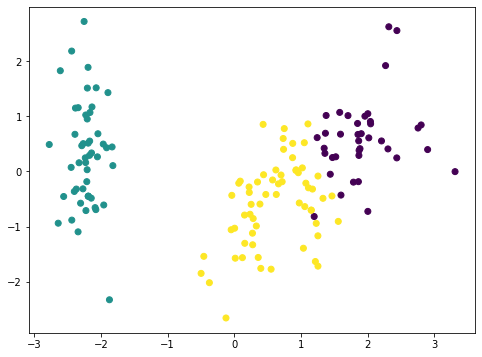

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(principalComponents[:,0],principalComponents[:,1], c=y_kmeans3)
plt.xlable= ("component 1")
plt.ylable= ("component 2")

PCA 3D

In [ ]:
pca3D = PCA(n_components = 3)
principalComponents3 = pca3D.fit_transform(datascaled)
principal3Df = pd.DataFrame(data = principalComponents3
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])


In [ ]:
final3Df = pd.concat([principal3Df, df_y_kmeans3],axis=1)
final3Df

,principal component 1,principal component 2,principal component 3,0
0,-2.264542,0.505704,-0.121943,1
1,-2.086426,-0.655405,-0.227251,1
2,-2.367950,-0.318477,0.051480,1
3,-2.304197,-0.575368,0.098860,1
4,-2.388777,0.674767,0.021428,1
...,...,...,...,...
145,1.870522,0.382822,0.254532,0
146,1.558492,-0.905314,-0.025382,2
147,1.520845,0.266795,0.179277,0
148,1.376391,1.016362,0.931405,0


In [ ]:
import plotly.express as pe
pe.scatter_3d(final3Df,x="principal component 1",y="principal component 2",z="principal component 3", color = y_kmeans3)

PCA before clustering

PCA 2D

In [ ]:
from sklearn.preprocessing import StandardScaler
datascaled2 = StandardScaler().fit_transform(x)

In [ ]:
from sklearn.decomposition import PCA
#PCA 2D projection
pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(datascaled2)

principalDf2 = pd.DataFrame(data = principalComponents2
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
from sklearn.cluster import KMeans
kmeanspca = KMeans(n_clusters = 3)
y_kmeanPCA2 = kmeanspca.fit_predict(principalDf2)

In [ ]:
kmeanspca.fit(principalDf2)

KMeans(n_clusters=3)

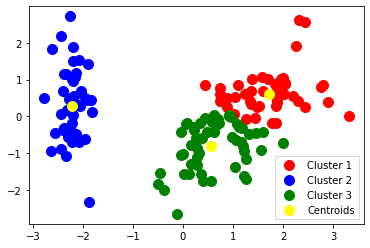

In [ ]:
#
plt.scatter(principalComponents2[y_kmeanPCA2 == 0, 0], principalComponents2[y_kmeanPCA2 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(principalComponents2[y_kmeanPCA2 == 1, 0], principalComponents2[y_kmeanPCA2 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(principalComponents2[y_kmeanPCA2 == 2, 0], principalComponents2[y_kmeanPCA2 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#
plt.scatter(kmeanspca.cluster_centers_[:, 0], kmeanspca.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

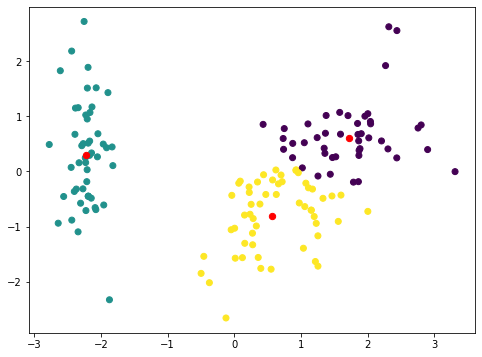

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(principalComponents2[:,0],principalComponents2[:,1], c=y_kmeanPCA2)
plt.scatter(kmeanspca.cluster_centers_[:, 0], kmeanspca.cluster_centers_[:,1], s = 40, c = 'red', label = 'Centroids')
plt.xlable= ("component 1")
plt.ylable= ("component 2")

PCA 3 components

In [ ]:
pca3D2 = PCA(n_components = 3)
principalComponents32 = pca3D2.fit_transform(datascaled)
principal3Df2 = pd.DataFrame(data = principalComponents32
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalComponents32

array([[-2.26454173e+00,  5.05703903e-01, -1.21943348e-01],
       [-2.08642550e+00, -6.55404729e-01, -2.27250832e-01],
       [-2.36795045e+00, -3.18477311e-01,  5.14796236e-02],
       [-2.30419716e+00, -5.75367713e-01,  9.88604444e-02],
       [-2.38877749e+00,  6.74767397e-01,  2.14278490e-02],
       [-2.07053681e+00,  1.51854856e+00,  3.06842583e-02],
       [-2.44571134e+00,  7.45626750e-02,  3.42197636e-01],
       [-2.23384186e+00,  2.47613932e-01, -8.25744645e-02],
       [-2.34195768e+00, -1.09514636e+00,  1.53562399e-01],
       [-2.18867576e+00, -4.48629048e-01, -2.46559522e-01],
       [-2.16348656e+00,  1.07059558e+00, -2.64009373e-01],
       [-2.32737775e+00,  1.58587455e-01,  1.00165616e-01],
       [-2.22408272e+00, -7.09118158e-01, -2.23214514e-01],
       [-2.63971626e+00, -9.38281982e-01,  1.89570030e-01],
       [-2.19229151e+00,  1.88997851e+00, -4.69480095e-01],
       [-2.25146521e+00,  2.72237108e+00,  3.26037967e-02],
       [-2.20275048e+00,  1.51375028e+00

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
y_kmeanPCA2 = kmeans.fit_predict(principal3Df2)

In [ ]:
kmeans.fit(principal3Df2)

KMeans(n_clusters=3)

In [ ]:
df_ykmeanPCA2=pd.DataFrame(y_kmeanPCA2)

In [ ]:
final3Df2 = pd.concat([principal3Df2, df_ykmeanPCA2],axis=1)
final3Df

,principal component 1,principal component 2,principal component 3,0
0,-2.264542,0.505704,-0.121943,1
1,-2.086426,-0.655405,-0.227251,1
2,-2.367950,-0.318477,0.051480,1
3,-2.304197,-0.575368,0.098860,1
4,-2.388777,0.674767,0.021428,1
...,...,...,...,...
145,1.870522,0.382822,0.254532,0
146,1.558492,-0.905314,-0.025382,2
147,1.520845,0.266795,0.179277,0
148,1.376391,1.016362,0.931405,0


In [ ]:
import plotly.express as pe
pe.scatter_3d(final3Df2,x="principal component 1",y="principal component 2",z="principal component 3", color = y_kmeanPCA2)

In [ ]:
from sklearn.metrics import rand_score
ris = rand_score(df["class"], y_kmeans3)
print(ris)

0.8797315436241611
